In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1

Selected 2020 Census Data from Kaggle. This data is collected by 'University of Texas' students in 2020.
Link: https://www.kaggle.com/datasets/takumafujiwara/2020-census-data

In [46]:
#Dataset Name: Census Income DataSet
# Protected Classes: Age, Sex, Color, National Origin
df = pd.read_csv("census_2020-v33.csv")
print(df.head())

    age  workclass  fnlwgt  education  educational-num      marital-status  \
0  63.0  State-gov  166860    HS-grad                9  Married-civ-spouse   
1  64.0  Local-gov  111745    HS-grad                9  Married-civ-spouse   
2  54.0    Private  151825    HS-grad                9            Divorced   
3  37.0    Private  174690    HS-grad                9       Never-married   
4  35.0    Private  197229  Assoc-voc               11  Married-civ-spouse   

         occupation   relationship   race  gender  hours-per-week  \
0   Exec-managerial           Wife  White  Female              40   
1  Transport-moving        Husband  White    Male              40   
2      Adm-clerical  Not-in-family  White  Female              44   
3     Other-service      Own-child  White    Male              21   
4    Prof-specialty           Wife  White  Female              40   

  native-country  coded-income  tax-bracket income-90k-threshold  
0  United-States            22            3      

In [47]:
print("Total no of observations: ", df.shape[0])
print("Total no of variables: ", df.shape[1])

Total no of observations:  36252
Total no of variables:  15


In [48]:
print("Variables in protected classes are: age, race, sex, National Origin")
#Age: (Age Discrimination in Employment Act of 1967) (over 40)
#Race: Civil Rights Act of 1964, 1991)
#Sex: Equal Pay Act of 1963; Civil Rights Act of 1964, 1991
#National Origin: Civil Rights Act of 1964, 1991)

Variables in protected classes are: age, race, sex, National Origin


# Step 2

In [49]:
# print("Race")
print(df.groupby('race').size())

race
Amer-Indian-Eskimo      402
Asian-Pac-Islander     2034
Black                  3817
Other                   841
White                 29158
dtype: int64


In [50]:
# print("Sex")
print(df.groupby('gender').size())

gender
Female    16454
Male      19798
dtype: int64


In [62]:
#df.loc[df['age'] == '120 +', 'age'] = 121
df['age'] = pd.to_numeric(df['age']) 
#Convert column to 5 groups to categorize the values
length_interval = np.linspace(df['age'].min()-1,df['age'].max(),6).astype('int')
df['age_group'] = pd.cut(df['age'], length_interval)
print(df['age_group'])

0        (57, 71]
1        (57, 71]
2        (43, 57]
3        (29, 43]
4        (29, 43]
           ...   
36247    (29, 43]
36248    (57, 71]
36249    (29, 43]
36250    (43, 57]
36251    (29, 43]
Name: age_group, Length: 36252, dtype: category
Categories (5, interval[int64, right]): [(16, 29] < (29, 43] < (43, 57] < (57, 71] < (71, 85]]


In [63]:
print(df.groupby('age_group').size())

age_group
(16, 29]     8617
(29, 43]    10676
(43, 57]     9764
(57, 71]     6270
(71, 85]      925
dtype: int64


In [64]:
pd.set_option('display.max_rows', None)
print(df.groupby('native-country').size().sort_values(ascending=False))
pd.set_option('display.max_rows', 100)

native-country
United-States           30937
Mexico                   1249
India                     404
Philippines               240
China                     187
El-Salvador               173
Puerto-Rico               140
Vietnam                   134
Guatemala                 129
Germany                   123
Cuba                      113
Dominican-Republic        109
Canada                    107
Columbia                   99
Honduras                   87
Jamaica                    74
Brazil                     71
Haiti                      69
Pakistan                   64
Venezuela                  64
Korea                      60
Ecuador                    58
Japan                      57
South-Korea                51
Nigeria                    48
Ukraine                    46
Iran                       44
Russia                     43
United-Kingdom             43
Peru                       42
England                    42
Taiwan                     41
Ethiopia                 

In [66]:
df['native-country2'] = df['native-country']

In [95]:
us_others = [x if x == 'United-States' else 'Others' for x in df['native-country2']]

In [97]:
df['native-country2'] = us_others

In [102]:
df.tail(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,coded-income,tax-bracket,income-90k-threshold,age_group,native-country2
36232,57.0,Private,79514,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,40,United-States,18,3,<=90k,"(43, 57]",United-States
36233,57.0,Private,91330,HS-grad,9,Married-spouse-absent,Other-service,Other-relative,Asian-Pac-Islander,Male,40,United-States,17,2,<=90k,"(43, 57]",United-States
36234,54.0,Private,102625,Assoc-acdm,12,Divorced,Other-service,Other-relative,Asian-Pac-Islander,Female,99,United-States,11,2,<=90k,"(43, 57]",United-States
36235,33.0,Private,108813,HS-grad,9,Married-civ-spouse,Other-service,Other-relative,Asian-Pac-Islander,Male,40,United-States,7,2,<=90k,"(29, 43]",United-States
36236,48.0,Private,97970,Assoc-acdm,12,Widowed,Other-service,Not-in-family,Asian-Pac-Islander,Female,25,United-States,5,2,<=90k,"(43, 57]",United-States
36237,35.0,Federal-gov,96289,Prof-school,15,Separated,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,80,United-States,41,4,>90k,"(29, 43]",United-States
36238,30.0,Private,77248,Assoc-voc,11,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,Female,32,United-States,16,2,<=90k,"(29, 43]",United-States
36239,22.0,Self-emp-inc,86157,Assoc-voc,11,Never-married,Exec-managerial,Not-in-family,White,Female,30,United-States,4,1,<=90k,"(16, 29]",United-States
36240,45.0,Self-emp-not-inc,101115,11th,7,Never-married,Transport-moving,Unmarried,Other,Male,40,United-States,37,4,>90k,"(43, 57]",United-States
36241,47.0,Private,106232,Bachelors,13,Never-married,Sales,Not-in-family,Asian-Pac-Islander,Male,45,United-States,27,3,<=90k,"(43, 57]",United-States


In [103]:
print(df.groupby('native-country2').size().sort_values(ascending=False))

native-country2
United-States    30937
Others            5315
dtype: int64


In [9]:
print(df.groupby('income-90k-threshold').size())
#<=50k = 0, >50k = 1

income-90k-threshold
<=90k    29171
>90k      7081
dtype: int64


In [65]:
print(df.groupby('tax-bracket').size())

tax-bracket
1     2177
2    14634
3    12141
4     7300
dtype: int64


In [104]:
df['disIncome'] = np.zeros(df.shape[0],dtype=int)
df.loc[df['income-90k-threshold'] == ">90k", 'disIncome'] = 1
print(df)

        age  workclass  fnlwgt  education  educational-num  \
0      63.0  State-gov  166860    HS-grad                9   
1      64.0  Local-gov  111745    HS-grad                9   
2      54.0    Private  151825    HS-grad                9   
3      37.0    Private  174690    HS-grad                9   
4      35.0    Private  197229  Assoc-voc               11   
...     ...        ...     ...        ...              ...   
36247  41.0    Private  180857    HS-grad                9   
36248  58.0    Private  117245    HS-grad                9   
36249  31.0    Private  126498    HS-grad                9   
36250  57.0    Private   72015  Bachelors               13   
36251  32.0    Private   94815    HS-grad                9   

           marital-status        occupation    relationship  \
0      Married-civ-spouse   Exec-managerial            Wife   
1      Married-civ-spouse  Transport-moving         Husband   
2                Divorced      Adm-clerical   Not-in-family   
3  

In [105]:
age_income = df.groupby(['age_group','disIncome'])['disIncome'].count().reset_index(name='counts')
age_income.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(age_income)

  age_group  disIncome  Frequency
0  (16, 29]          0       8158
1  (16, 29]          1        459
2  (29, 43]          0       8513
3  (29, 43]          1       2163
4  (43, 57]          0       7232
5  (43, 57]          1       2532
6  (57, 71]          0       4584
7  (57, 71]          1       1686
8  (71, 85]          0        684
9  (71, 85]          1        241


In [106]:
race_income = df.groupby(['race','disIncome'])['disIncome'].count().reset_index(name='counts')
age_income.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(race_income)

                 race  disIncome  counts
0  Amer-Indian-Eskimo          0     367
1  Amer-Indian-Eskimo          1      35
2  Asian-Pac-Islander          0    1441
3  Asian-Pac-Islander          1     593
4               Black          0    3352
5               Black          1     465
6               Other          0     726
7               Other          1     115
8               White          0   23285
9               White          1    5873


In [114]:
gender_income = df.groupby(['gender','disIncome'])['disIncome'].count().reset_index(name='counts')
gender_income.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(gender_income)

   gender  disIncome  Frequency
0  Female          0      14346
1  Female          1       2108
2    Male          0      14825
3    Male          1       4973


In [122]:
native_country2_income = df.groupby(['native-country2','disIncome'])['disIncome'].count().reset_index(name='counts')
native_country2_income.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(native_country2_income)

  native-country2  disIncome  Frequency
0          Others          0       4273
1          Others          1       1042
2   United-States          0      24898
3   United-States          1       6039


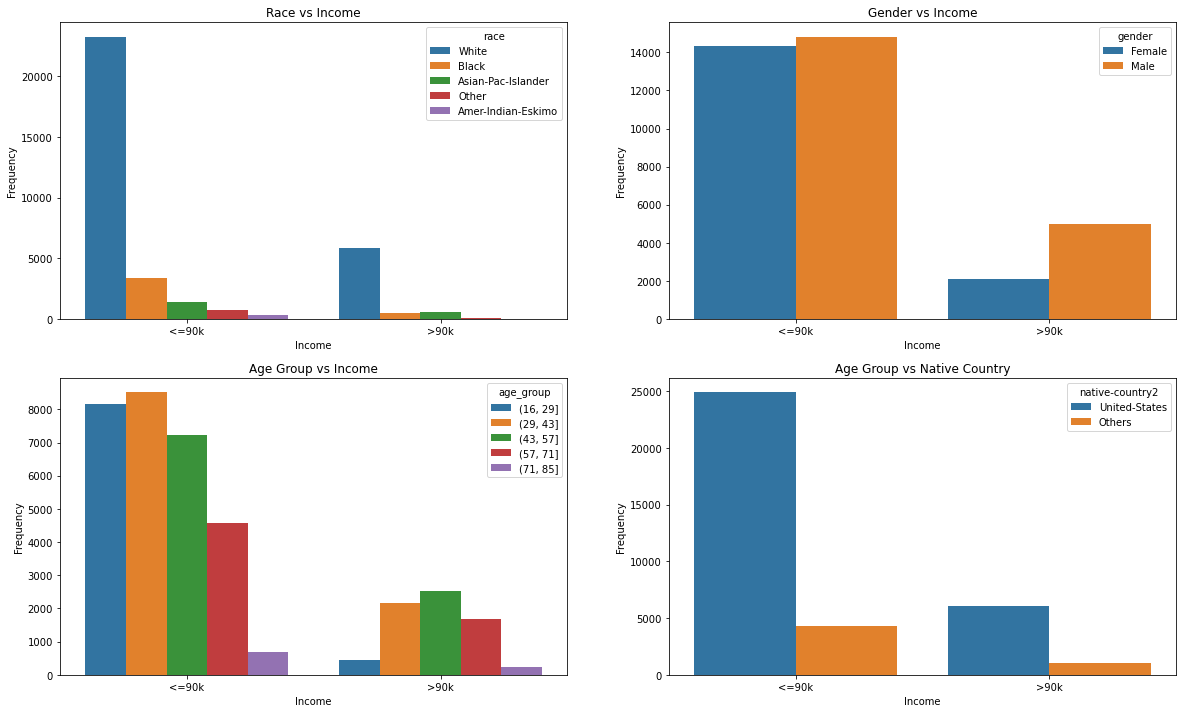

In [124]:

fig = plt.figure(figsize = (20,12))

ax1 = fig.add_subplot(221)
sns.countplot(x='income-90k-threshold', hue='race', data=df,ax=ax1).set_title("Race vs Income")
ax1.set(xlabel = 'Income',ylabel = "Frequency")

ax2 = fig.add_subplot(222)
sns.countplot(x='income-90k-threshold', hue='gender', data=df,ax=ax2).set_title("Gender vs Income")
ax2.set(xlabel = 'Income',ylabel = "Frequency")

ax3 = fig.add_subplot(223)
sns.countplot(x='income-90k-threshold', hue='age_group', data=df,ax=ax3).set_title("Age Group vs Income")
ax3.set(xlabel = 'Income',ylabel = "Frequency")

ax4 = fig.add_subplot(224)
sns.countplot(x='income-90k-threshold', hue='native-country2', data=df,ax=ax4).set_title("Age Group vs Native Country")
ax4.set(xlabel = 'Income',ylabel = "Frequency")

plt.show()

In [125]:
age_income2 = df.groupby(['age_group','tax-bracket'])['tax-bracket'].count().reset_index(name='counts')
age_income2.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(age_income2)

   age_group  tax-bracket  Frequency
0   (16, 29]            1       1253
1   (16, 29]            2       4851
2   (16, 29]            3       2034
3   (16, 29]            4        479
4   (29, 43]            1        448
5   (29, 43]            2       4034
6   (29, 43]            3       3954
7   (29, 43]            4       2240
8   (43, 57]            1        312
9   (43, 57]            2       3313
10  (43, 57]            3       3541
11  (43, 57]            4       2598
12  (57, 71]            1        151
13  (57, 71]            2       2112
14  (57, 71]            3       2271
15  (57, 71]            4       1736
16  (71, 85]            1         13
17  (71, 85]            2        324
18  (71, 85]            3        341
19  (71, 85]            4        247


In [126]:
race_income2 = df.groupby(['race','tax-bracket'])['tax-bracket'].count().reset_index(name='counts')
age_income2.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(race_income2)

                  race  tax-bracket  counts
0   Amer-Indian-Eskimo            1      28
1   Amer-Indian-Eskimo            2     224
2   Amer-Indian-Eskimo            3     113
3   Amer-Indian-Eskimo            4      37
4   Asian-Pac-Islander            1      88
5   Asian-Pac-Islander            2     680
6   Asian-Pac-Islander            3     656
7   Asian-Pac-Islander            4     610
8                Black            1     293
9                Black            2    1913
10               Black            3    1129
11               Black            4     482
12               Other            1      68
13               Other            2     416
14               Other            3     238
15               Other            4     119
16               White            1    1700
17               White            2   11401
18               White            3   10005
19               White            4    6052


In [127]:
gender_income3 = df.groupby(['gender','tax-bracket'])['tax-bracket'].count().reset_index(name='counts')
gender_income3.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(gender_income3)

   gender  tax-bracket  Frequency
0  Female            1       1279
1  Female            2       7730
2  Female            3       5245
3  Female            4       2200
4    Male            1        898
5    Male            2       6904
6    Male            3       6896
7    Male            4       5100


In [128]:
native_country2_income2 = df.groupby(['native-country2','tax-bracket'])['tax-bracket'].count().reset_index(name='counts')
native_country2_income2.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(native_country2_income2)

  native-country2  tax-bracket  Frequency
0          Others            1        294
1          Others            2       2404
2          Others            3       1552
3          Others            4       1065
4   United-States            1       1883
5   United-States            2      12230
6   United-States            3      10589
7   United-States            4       6235


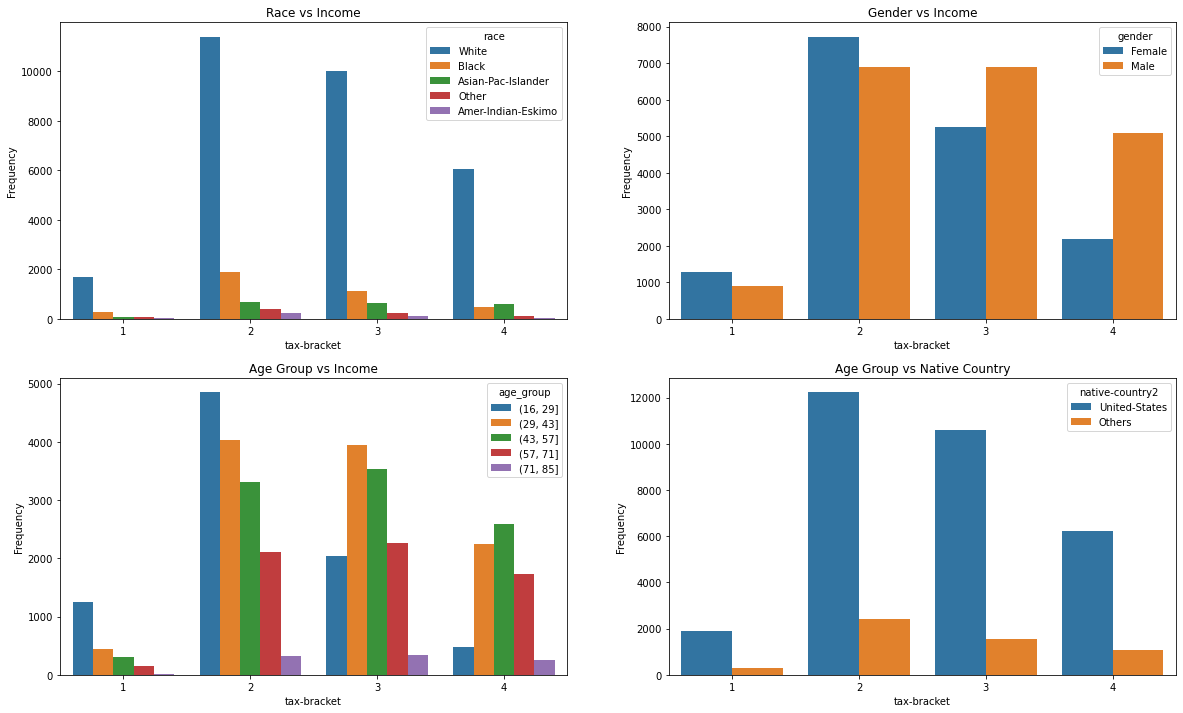

In [129]:
fig = plt.figure(figsize = (20,12))

ax1 = fig.add_subplot(221)
sns.countplot(x='tax-bracket', hue='race', data=df,ax=ax1).set_title("Race vs Income")
ax1.set(xlabel = 'tax-bracket',ylabel = "Frequency")

ax2 = fig.add_subplot(222)
sns.countplot(x='tax-bracket', hue='gender', data=df,ax=ax2).set_title("Gender vs Income")
ax2.set(xlabel = 'tax-bracket',ylabel = "Frequency")

ax3 = fig.add_subplot(223)
sns.countplot(x='tax-bracket', hue='age_group', data=df,ax=ax3).set_title("Age Group vs Income")
ax3.set(xlabel = 'tax-bracket',ylabel = "Frequency")

ax4 = fig.add_subplot(224)
sns.countplot(x='tax-bracket', hue='native-country2', data=df,ax=ax4).set_title("Age Group vs Native Country")
ax4.set(xlabel = 'tax-bracket',ylabel = "Frequency")

plt.show()

# Step 3
1. Privileged Group: {Race: White, Gender: male, Age group: (43,57), Native Country: United-State}

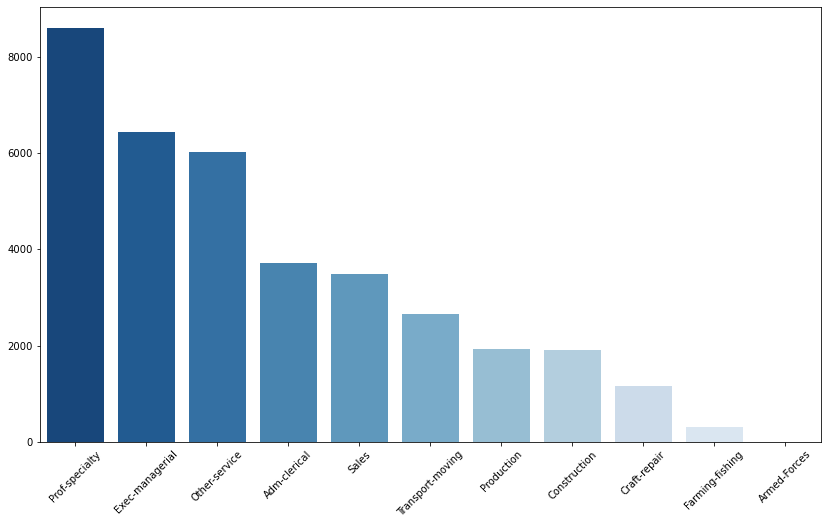

In [130]:
occupation = df['occupation'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x =occupation.index , y =occupation.values ,palette="Blues_r" )
plt.xticks(rotation = 45)
plt.show()

In [132]:
classification = {
     'Prof-specialty': 11,
     'Exec-managerial': 10,
     'Other-service':9,
     'Adm-clerical': 8,
     'Sales': 7,
     'Transport-moving':6,
     'Production': 5,
     'Construction' :4,
     'Craft-repair':3,
     'Farming-fishing':2,
     'Armed-Forces' :1
}
df['occupation_num'] = df['occupation'].map(classification)


In [133]:
df['salaryWorthiness'] = df['occupation_num'] + (df['educational-num'] * df['hours-per-week'])
print(df)

        age  workclass  fnlwgt  education  educational-num  \
0      63.0  State-gov  166860    HS-grad                9   
1      64.0  Local-gov  111745    HS-grad                9   
2      54.0    Private  151825    HS-grad                9   
3      37.0    Private  174690    HS-grad                9   
4      35.0    Private  197229  Assoc-voc               11   
...     ...        ...     ...        ...              ...   
36247  41.0    Private  180857    HS-grad                9   
36248  58.0    Private  117245    HS-grad                9   
36249  31.0    Private  126498    HS-grad                9   
36250  57.0    Private   72015  Bachelors               13   
36251  32.0    Private   94815    HS-grad                9   

           marital-status        occupation    relationship  \
0      Married-civ-spouse   Exec-managerial            Wife   
1      Married-civ-spouse  Transport-moving         Husband   
2                Divorced      Adm-clerical   Not-in-family   
3  

In [135]:
cases = [
 (df['salaryWorthiness'] >= 350) & (df['race'] == 'White'),
 (df['salaryWorthiness'] < 350) & (df['race'] == 'White'),
 (df['salaryWorthiness'] >= 350) & (df['race'] == 'Black'),
 (df['salaryWorthiness'] < 350) & (df['race'] == 'Black')
 ]
choices = ['white_approved', 'white_declined', 'black_approved', 'black_declined']
df['approval/declined_list'] = np.select(cases, choices)
df.groupby(['approval/declined_list'])['approval/declined_list'].count()
# df.race.unique()

approval/declined_list
0                  3277
black_approved     2961
black_declined      856
white_approved    22794
white_declined     6364
Name: approval/declined_list, dtype: int64

Table showing Favorable(Good Salary Worthiness) vs Unfavorable(Bad Salary Worthiness) outcomes:
    
    Group                             Favorable(Approved)           Unfavorable(Declined)
    Privileged Group(White)              22794                         6364
    Unprivileged Group(Black)            2961                          856

In [19]:
cases = [
 (df['salaryWorthiness'] >= 350) & (df['gender'] == 'Male'),
 (df['salaryWorthiness'] < 350) & (df['gender'] == 'Male'),
 (df['salaryWorthiness'] >= 350) & (df['gender'] == 'Female'),
 (df['salaryWorthiness'] < 350) & (df['gender'] == 'Female')
 ]
choices = ['male_approved', 'male_declined', 'female_approved', 'female_declined']
df['gender_salaryWorthiness_list'] = np.select(cases, choices)
df.groupby(['gender_salaryWorthiness_list'])['gender_salaryWorthiness_list'].count()
# df.gender.unique()

gender_salaryWorthiness_list
female_approved    12178
female_declined     4276
male_approved      16216
male_declined       3582
Name: gender_salaryWorthiness_list, dtype: int64

Table showing Favorable(Good Salary Worthiness) vs Unfavorable(Bad Salary Worthiness) outcomes:
    
    Group                             Favorable(Approved)           Unfavorable(Declined)
    Privileged Group(Male)                16216                          3582
    Unprivileged Group(Female)            12178                          4276

In [137]:
cases = [
 (df['salaryWorthiness'] >= 350) & (df['age'] > 16) & (df['age'] < 30),
 (df['salaryWorthiness'] < 350) & (df['age'] > 16) & (df['age'] < 30),
 (df['salaryWorthiness'] >= 350) & (df['age'] > 44) & (df['age'] < 58),
 (df['salaryWorthiness'] < 350) & (df['age'] > 44) & (df['age'] < 58),
    
 ]
choices = ['younger_approved', 'younger_declined', 'older_approved', 'older_declined']
df['age_group_salaryWorthiness_list'] = np.select(cases, choices)
df.groupby(['age_group_salaryWorthiness_list'])['age_group_salaryWorthiness_list'].count()

age_group_salaryWorthiness_list
0                   18513
older_approved       7713
older_declined       1409
younger_approved     5751
younger_declined     2866
Name: age_group_salaryWorthiness_list, dtype: int64

Table showing Favorable(Good Salary Worthiness) vs Unfavorable(Bad Salary Worthiness) outcomes:
    
    Group                             Favorable(Approved)           Unfavorable(Declined)
    Privileged Group((43,57])                7713                           1409
    Unprivileged Group((16,29])              5751                           2866

In [35]:
cases = [
 (df['disIncome'] ==0) & (df['race'] == 'White'),
 (df['disIncome'] ==1) & (df['race'] == 'White'),
 (df['disIncome'] ==0) & (df['race'] == 'Black'),
 (df['disIncome'] == 1) & (df['race'] == 'Black')
 ]
choices = ['white_approved', 'white_declined', 'black_approved', 'black_declined']
df['raceVsIncome_list'] = np.select(cases, choices)
df.groupby(['raceVsIncome_list'])['raceVsIncome_list'].count()

raceVsIncome_list
0                  3277
black_approved     3352
black_declined      465
white_approved    23285
white_declined     5873
Name: raceVsIncome_list, dtype: int64

In [37]:
cases = [
 (df['disIncome'] ==0) &  (df['gender'] == 'Male'),
 (df['disIncome'] ==1) &  (df['gender'] == 'Male'),
 (df['disIncome'] ==0) & (df['gender'] == 'Female'),
 (df['disIncome'] == 1) & (df['gender'] == 'Female')
 ]
choices = ['male_approved', 'male_declined', 'female_approved', 'female_declined']
df['genderVsIncome_list'] = np.select(cases, choices)
df.groupby(['genderVsIncome_list'])['genderVsIncome_list'].count()

genderVsIncome_list
female_approved    14346
female_declined     2108
male_approved      14825
male_declined       4973
Name: genderVsIncome_list, dtype: int64

In [52]:
cases = [
 (df['disIncome'] ==0) & (df['age'] > 17) & (df['age'] < 30),
 (df['disIncome'] ==1) & (df['age'] > 17) & (df['age'] < 30),
 (df['disIncome'] ==0) & (df['age'] > 44) & (df['age'] < 57),
 (df['disIncome'] ==1) & (df['age'] > 44) & (df['age'] < 57),
    
 ]
choices = ['older_approved', 'older_declined', 'younger_approved', 'younger_declined']
df['ageVsIncome_list'] = np.select(cases, choices)
df.groupby(['ageVsIncome_list'])['ageVsIncome_list'].count()

ageVsIncome_list
0                   19478
older_approved       7919
older_declined        459
younger_approved     6216
younger_declined     2180
Name: ageVsIncome_list, dtype: int64

# Bias Mitigation Algorithm

# Race

# Gender

# AGE-Group

# STEP 4